In [29]:
import os
import sys

WDIR = '/home/jdv/code/activmask/activmask'
sys.path.insert(0, os.path.dirname(WDIR))
os.chdir(WDIR)

import inspect
from datasets.synth import SyntheticDataset
import json
import medpy
import collections
import h5py
import ntpath
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Make Dataset
--------------------

In [25]:
"""
goal: randomly generate a dataset of images with the following properties:
    training set:
        class 0: two cross symbols as the main predictor (add noise and random cropping of 
                 crosses to make less predictive). single solid rectangle in lower left 
                 corner as a distractor.
        class 1: one cross symbol as main predictor. single solid rectangle in lower 
                 right corner as distractor
    test set:
        Same as training but the relationship between the               
         
"""

def add_cross(img, class_label, cross_dims=5, add_noise=False):
    """ Add the predictive cross(es) to the image arbirarily (may accidentally intersect the distractor, but
            that's ok). Class label defines how many times the cross is placed to ensure no overlap
    
        Args: 
            class_label: 0 or 1
            add_noise: True/False - if True, add blurring, randomly truncate cross limbs proportional to how
                        long they are
    """

    x_centres = np.random.choice(range(cross_dims, 28-cross_dims), size=[class_label + 1], replace=False)
    y_centres = np.random.choice(range(cross_dims, 28-cross_dims), size=[class_label + 1], replace=False)
    for i in range(class_label+1):

        centre_x = x_centres[i]
        centre_y = y_centres[i]
        img[centre_x-cross_dims:centre_x+cross_dims+1, centre_y] = 1
        img[centre_x, centre_y-cross_dims:centre_y+cross_dims+1] = 1

        
def add_distractor(img, class_label, tag_dims=[2,3], add_noise=False):
    """
    Add a distractor for prediction based on the class label - zero puts it on the left, one puts it on the
            right
        
        Args:
            tag_dims: list of the sizes for the rectangular distractor tag
            add_noise: True/False - if True, blurs the distractor and also shifts its location by some
                        random amount fixed within 2-5 pixels from the edges of the image
    """
    tag_buffer = 5
    size_x, size_y = img.shape
    if class_label == 0:
        # buffer of 5 from the border
        img[size_y-tag_buffer-tag_dims[0]:size_y-tag_buffer, tag_buffer:tag_buffer+tag_dims[1]] = 1
        tag_centre_x = (tag_buffer+tag_dims[1]) // 2
        tag_centre_y = 1
    else:
        img[size_y-tag_buffer-tag_dims[0]:size_y-tag_buffer, size_x-tag_buffer-tag_dims[1]:size_x-tag_buffer] = 1

        
def make_synthetic_dataset(length, mode, folder, root="../data/synth_hard", img_size=28, seed=0):
    """ 
    Dataset Builder
    Parameters: 
        length: how many images should be generated
        mode: string of either train or test
    
    """
    os.makedirs(root, exist_ok=True)
    
    labels = {}
    labels_dict = pd.DataFrame(columns=["file","class"])
    np.random.seed(seed)
    
    for n in range(length):
        print("making ", n, " of ", length, " files")
        if n < length//2:
            label = 0
        else:
            label = 1 # even data split

        img_base = np.zeros([img_size,img_size])
        add_cross(img_base, label, cross_dims=np.random.randint(3,5))
        img_seg = np.zeros([img_size,img_size])
        img_seg[:,:] = img_base[:,:]
        
        if mode == 'distractor':
            add_distractor(img_base, label)
        
        # save image and segmentation map to file
        np.save("{}/{}_img_{}.npy".format(root, folder, n), img_base)
        np.save("{}/{}_seg_{}.npy".format(root, folder, n), img_seg)

        labels["{}/{}_img_{}.npy".format(root, folder, n)] = label

    labels_dict["file"] = labels.keys()
    labels_dict["file"] = labels_dict["file"].str.replace(root,"")
    labels_dict["file"] = labels_dict["file"].str.replace("/","")
    labels_dict["class"] = labels.values()
    labels_dict = labels_dict.set_index("file")
    labels_dict.to_csv("{}/{}_labels.csv".format(root, folder))

In [26]:
make_synthetic_dataset(512, "distractor", "distractor1", seed=1)
make_synthetic_dataset(512, "distractor", "distractor2", seed=2)
make_synthetic_dataset(512, "distractor", "distractor3", seed=3)

making  0  of  512  files
making  1  of  512  files
making  2  of  512  files
making  3  of  512  files
making  4  of  512  files
making  5  of  512  files
making  6  of  512  files
making  7  of  512  files
making  8  of  512  files
making  9  of  512  files
making  10  of  512  files
making  11  of  512  files
making  12  of  512  files
making  13  of  512  files
making  14  of  512  files
making  15  of  512  files
making  16  of  512  files
making  17  of  512  files
making  18  of  512  files
making  19  of  512  files
making  20  of  512  files
making  21  of  512  files
making  22  of  512  files
making  23  of  512  files
making  24  of  512  files
making  25  of  512  files
making  26  of  512  files
making  27  of  512  files
making  28  of  512  files
making  29  of  512  files
making  30  of  512  files
making  31  of  512  files
making  32  of  512  files
making  33  of  512  files
making  34  of  512  files
making  35  of  512  files
making  36  of  512  files
making  37 

making  359  of  512  files
making  360  of  512  files
making  361  of  512  files
making  362  of  512  files
making  363  of  512  files
making  364  of  512  files
making  365  of  512  files
making  366  of  512  files
making  367  of  512  files
making  368  of  512  files
making  369  of  512  files
making  370  of  512  files
making  371  of  512  files
making  372  of  512  files
making  373  of  512  files
making  374  of  512  files
making  375  of  512  files
making  376  of  512  files
making  377  of  512  files
making  378  of  512  files
making  379  of  512  files
making  380  of  512  files
making  381  of  512  files
making  382  of  512  files
making  383  of  512  files
making  384  of  512  files
making  385  of  512  files
making  386  of  512  files
making  387  of  512  files
making  388  of  512  files
making  389  of  512  files
making  390  of  512  files
making  391  of  512  files
making  392  of  512  files
making  393  of  512  files
making  394  of  512

making  210  of  512  files
making  211  of  512  files
making  212  of  512  files
making  213  of  512  files
making  214  of  512  files
making  215  of  512  files
making  216  of  512  files
making  217  of  512  files
making  218  of  512  files
making  219  of  512  files
making  220  of  512  files
making  221  of  512  files
making  222  of  512  files
making  223  of  512  files
making  224  of  512  files
making  225  of  512  files
making  226  of  512  files
making  227  of  512  files
making  228  of  512  files
making  229  of  512  files
making  230  of  512  files
making  231  of  512  files
making  232  of  512  files
making  233  of  512  files
making  234  of  512  files
making  235  of  512  files
making  236  of  512  files
making  237  of  512  files
making  238  of  512  files
making  239  of  512  files
making  240  of  512  files
making  241  of  512  files
making  242  of  512  files
making  243  of  512  files
making  244  of  512  files
making  245  of  512

making  55  of  512  files
making  56  of  512  files
making  57  of  512  files
making  58  of  512  files
making  59  of  512  files
making  60  of  512  files
making  61  of  512  files
making  62  of  512  files
making  63  of  512  files
making  64  of  512  files
making  65  of  512  files
making  66  of  512  files
making  67  of  512  files
making  68  of  512  files
making  69  of  512  files
making  70  of  512  files
making  71  of  512  files
making  72  of  512  files
making  73  of  512  files
making  74  of  512  files
making  75  of  512  files
making  76  of  512  files
making  77  of  512  files
making  78  of  512  files
making  79  of  512  files
making  80  of  512  files
making  81  of  512  files
making  82  of  512  files
making  83  of  512  files
making  84  of  512  files
making  85  of  512  files
making  86  of  512  files
making  87  of  512  files
making  88  of  512  files
making  89  of  512  files
making  90  of  512  files
making  91  of  512  files
m

making  393  of  512  files
making  394  of  512  files
making  395  of  512  files
making  396  of  512  files
making  397  of  512  files
making  398  of  512  files
making  399  of  512  files
making  400  of  512  files
making  401  of  512  files
making  402  of  512  files
making  403  of  512  files
making  404  of  512  files
making  405  of  512  files
making  406  of  512  files
making  407  of  512  files
making  408  of  512  files
making  409  of  512  files
making  410  of  512  files
making  411  of  512  files
making  412  of  512  files
making  413  of  512  files
making  414  of  512  files
making  415  of  512  files
making  416  of  512  files
making  417  of  512  files
making  418  of  512  files
making  419  of  512  files
making  420  of  512  files
making  421  of  512  files
making  422  of  512  files
making  423  of  512  files
making  424  of  512  files
making  425  of  512  files
making  426  of  512  files
making  427  of  512  files
making  428  of  512

View Dataset
-------------------

In [27]:
# Prepare datasets.
DATAROOT = "../data/synth_hard/"
train = SyntheticDataset(dataroot=DATAROOT, mode="distractor1", 
    blur=3, nsamples=10, distract_noise=0)
valid = SyntheticDataset(dataroot=DATAROOT, mode="distractor2", 
    blur=3, nsamples=10, distract_noise=1)

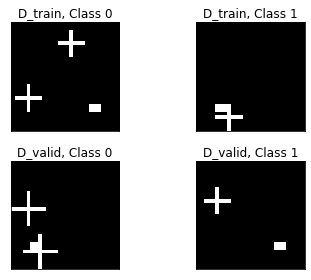

In [28]:
# Loop stuff.
dataloaders = [train, valid]
images = [[1,5],[4,6]]
titles = [
    ["D_train, Class 0", "D_train, Class 1"],
    ["D_valid, Class 0", "D_valid, Class 1"]
]

fig, axs = plt.subplots(nrows=2, ncols=2, squeeze=True)

for i, ax_dist in enumerate(axs):
    for j, ax in enumerate(ax_dist):
        img = dataloaders[i][images[i][j]]
        
        ax.imshow(img[0][0], interpolation='none', cmap='Greys_r')
        ax.set_title(titles[i][j])
        ax.get_xaxis().set_visible(False)       
        ax.get_yaxis().set_visible(False)
    
fig.set_tight_layout(tight=True)